Multiples versions affichage occurences, graphes et versions texte à la fin + faire une version par page ? 
Définir vocabulaire


In [1]:
from collections import Collection
from tqdm import tqdm

C:\Users\portable_laura\AppData\Local\Temp\ipykernel_16028\2642156256.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Collection


### Ouverture des documents

In [2]:
import os


dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'


longue_chaine = ''

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
            longue_chaine += f.read()

print(longue_chaine)


KeyboardInterrupt: 

In [4]:
len(longue_chaine)

1008133128

### Occurences dans le texte avec contexte

In [ ]:
import re

def concordancier(texte, mot_cible, contexte=3):
    
    mots = re.findall(r'\b\w+\b', texte.lower())  
    indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]  

    resultats = []

    for index in indices:
        
        debut = max(0, index - contexte)  
        fin = min(len(mots), index + contexte + 1)  

        contexte_texte = ' '.join(mots[debut:fin])

        resultats.append((index + 1, contexte_texte)) 

    return resultats


#=================================
mot_cible = 'eau'

resultats = concordancier(longue_chaine, mot_cible, contexte=8)

for index, contexte in resultats:
    print(f"Occurence {index}: ... {contexte} ...")
#=================================


In [ ]:
#Occurences simples sans ajout quelconque
import os
import re


dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'


longue_chaine = ''
mot_cible = "batellerie"
contexte = 8
resultats = []

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
            longue_chaine = f.read()
        

        mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
        indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]  

        for index in indices:
        
            debut = max(0, index - contexte)  
            fin = min(len(mots), index + contexte + 1)  

            contexte_texte = ' '.join(mots[debut:fin])

            resultats.append((index + 1, contexte_texte)) 


for index, contexte in resultats:
    print(f"Occurence {index}: ... {contexte} ...")



Occurence 37266: ... l etat se borne à mettre à laqtraltl0ndela batellerie des voies de navifatioaussiparfaitesque possible et c est ...
Occurence 26817: ... nord par suite de la concurrence que la batellerie fait au chemin de fer du nord concurrence ...
Occurence 28671: ... rôle en mettant à la disposition de la batellerie des voies de navigation aussi parfaites que possible ...
Occurence 28825: ... entier le moyen serait l uniformisation de la batellerie par le système beuchot les conséquences inévitables seraient ...
Occurence 28847: ... de son adoption de toutes les entreprises de batellerie privée dues à la libre concurrence en face ...
Occurence 27300: ... rempli son rôle en mettantà disposition de la batellerie des voies dena gation aussi parfaites que possible ...
Occurence 27447: ... par suite de son adoption detoutesles entreprises de batellerie privéeduesa la libre concurrence n a ace d ...
Occurence 22277: ... lorsqu on a voulu entreprendre les travaux la batellerie a été o

### Separation seances

In [1]:
#Occurences avec indications de dates seances, contexte et large extrait
import os
import re
from collections import defaultdict
from tqdm import tqdm
import pandas as pd

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

def concordancier(dossier, mot_cible, contexte,extrait=1000):
    lignes_df = []  

    for fichier in tqdm(os.listdir(dossier)):
        if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
            date_document = extraire_date(fichier)

            if date_document:
                with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                    longue_chaine = f.read()

                mots = re.findall(r'\b\w+\b', longue_chaine.lower())
                indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

                for index in indices:
                    debut = max(0, index - contexte)
                    fin = min(len(mots), index + contexte + 1)

                    contexte_avant = mots[debut:index]
                    mot = mots[index]
                    contexte_apres = mots[index + 1:fin]

                    texte_total = ' '.join(contexte_avant + [mot] + contexte_apres)

                    # Ajout dans la liste
                    lignes_df.append({
                        'date': date_document,
                        'contexte_avant': ' '.join(contexte_avant),
                        'mot_cible': mot,
                        'contexte_apres': ' '.join(contexte_apres),
                        'texte_total': texte_total
                    })

    df_concord = pd.DataFrame(lignes_df)
    return df_concord

#============================
dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted'
mot_cible = "barrage"
contexte = 8
longueur_extrait = 1000

concordances_barrage = concordancier(dossier,mot_cible,contexte,longueur_extrait)
concordances_barrage.head()
dates_barrage = concordances_barrage['date'].unique()
#============================





 32%|███▏      | 2268/7167 [02:10<04:42, 17.36it/s]


KeyboardInterrupt: 

In [2]:
concordances_inon = concordancier(dossier,"inondation",8,1000)
dates_inon = concordances_inon['date'].unique()
dates_canal = concordances_canal['date'].unique()
concordances_inon.head()


100%|██████████| 7166/7166 [06:54<00:00, 17.29it/s]


,date,contexte_avant,mot_cible,contexte_apres,texte_total
0,1881-01-22,admettez pour les vingt cantons victimes de l,inondation,une proportion analogue vous arrivez à un total,au chiffre de 246 000 fr mais les pertes éprou...
1,1881-01-22,les com munes de ce département où l,inondation,est venue enlever toutes les ressources de l,entre les mains des petits propriétairesetdes ...
2,1881-02-14,croîs pas que ce soit ce genre d,inondation,qui soit dangereux je crois que les journaux,identique mais une réglementation quelle qu el...
3,1881-06-29,un écroulement sérieux ne se produise causant l,inondation,d3 toutes les rues qui sont en contre,michelseraalors un îlot même àhierasse î i rap...
4,1882-03-30,cinq risques suivants incendie grêle gelée épi...,inondation,seront à partir du 1er janvier 1883 obligatoir...,même prime pour un risque presque nul afin de ...


In [3]:
#Nombre de seances concernées, sauvegarde des informations

dates_inon_liste = dates_inon.tolist()
dates_canal_liste = dates_canal.tolist()
print(f'{len(dates_inon_liste)} séances mentionnent le terme "Inondation", {len(dates_canal_liste)} séances mentionnent le terme "canal"')

concordances_inon.to_csv("C:/Users/portable_laura/Desktop/memoire_prod_finale/data/concord_inon.csv", index=False, encoding='utf-8')
concordances_canal.to_csv("C:/Users/portable_laura/Desktop/memoire_prod_finale/data/concord_canal.csv", index=False, encoding='utf-8')

408 séances mentionnent le terme "Inondation", 1753 séances mentionnent le terme "canal"


In [4]:
dates_barrage = concordances_barrage['date'].unique()

dates_barrage_liste = dates_barrage.tolist()
print(f'{len(dates_barrage_liste)} séances mentionnent le terme "barrage"')

concordances_barrage.to_csv("C:/Users/portable_laura/Desktop/memoire_prod_finale/data/concord_barrage.csv", index=False, encoding='utf-8')


411 séances mentionnent le terme "barrage"


In [2]:
import os
import re
from tqdm import tqdm
import pandas as pd

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

def concordancier(dossier, mot_cible, contexte, extrait=1000):
    lignes_df = []  

    for fichier in tqdm(os.listdir(dossier)):
        if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
            date_document = extraire_date(fichier)

            if date_document:
                with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                    longue_chaine = f.read()

                mots = re.findall(r'\b\w+\b', longue_chaine.lower())
                indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

                for index in indices:
                    debut = max(0, index - extrait)  
                    fin = min(len(mots), index + extrait + 1)  
                    extrait_complet = mots[debut:fin]
                    texte_total = ' '.join(extrait_complet)

                    contexte_avant = mots[max(0, index - contexte):index]
                    contexte_apres = mots[index + 1:min(len(mots), index + 1 + contexte)]

                    lignes_df.append({
                        'date': date_document,
                        'contexte_avant': ' '.join(contexte_avant),
                        'mot_cible': mot_cible,
                        'contexte_apres': ' '.join(contexte_apres),
                        'texte_total': texte_total
                    })
    df_concord = pd.DataFrame(lignes_df)
    return df_concord

# ============================
dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted'
mot_cible = "barrage"
contexte = 8  
longueur_extrait = 500 

concordances_barrage = concordancier(dossier, mot_cible, contexte, extrait=longueur_extrait)
concordances_barrage.head()


  0%|          | 0/7167 [00:00<?, ?it/s]

100%|██████████| 7167/7167 [08:10<00:00, 14.60it/s]


,date,contexte_avant,mot_cible,contexte_apres,texte_total
0,1882-06-27,loi est relatif à l exécution d un,barrage,et d un canal d irrigation dans l,un même bâtiment 800 malades quand il a été co...
1,1882-07-04,contribu tive du concessionnaire à la reconstr...,barrage,de cocussotte et de la somme nécessaire pour,jour appelle la discussion du projet de loi ay...
2,1882-07-24,autoriserait quelques esprits trop timorés à p...,barrage,absolu du détroit du pasde calais la commission,supprimant je transbordement des voyageurs et ...
3,1882-12-04,de la frontière française il faudra établir un,barrage,sur le territoire anglais et de plus traverser,tin qde habûiutaanntts tlienospossessions mp c...
4,1883-03-01,région l altération du fleuve d pinay au,barrage,de bezons il y a uneadlioration apparente mais,tous les jours par ses égouts dans la seine le...


### Graphes et représentations visuelles

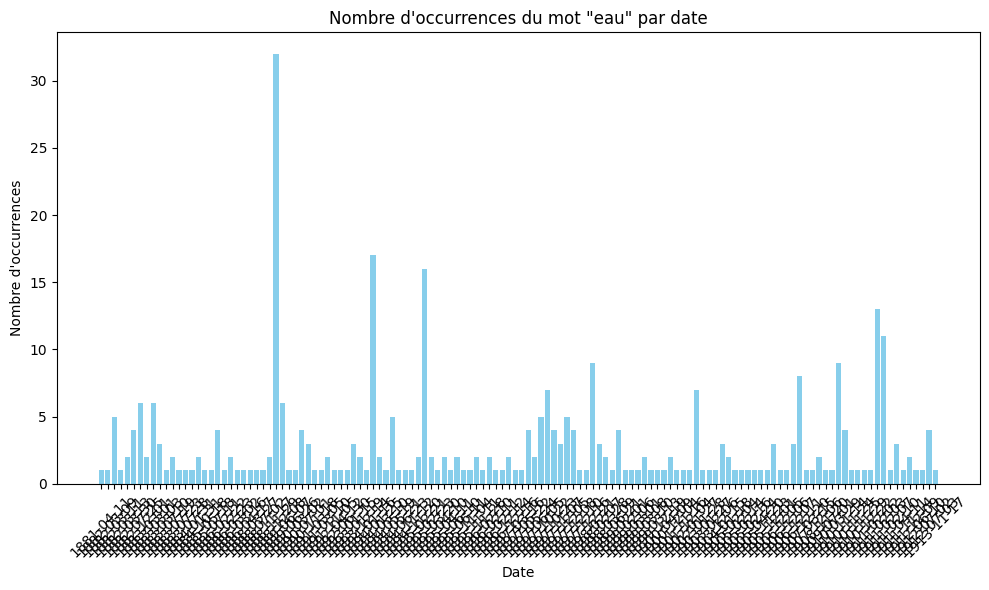

In [ ]:
#Occurences affichage brouillé 


import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates = list(comptages_par_date.keys())
occurrences = list(comptages_par_date.values())

plt.figure(figsize=(10, 6))
plt.bar(dates, occurrences, color='skyblue')

plt.xlabel('Date')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences du mot "batellerie" par date')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


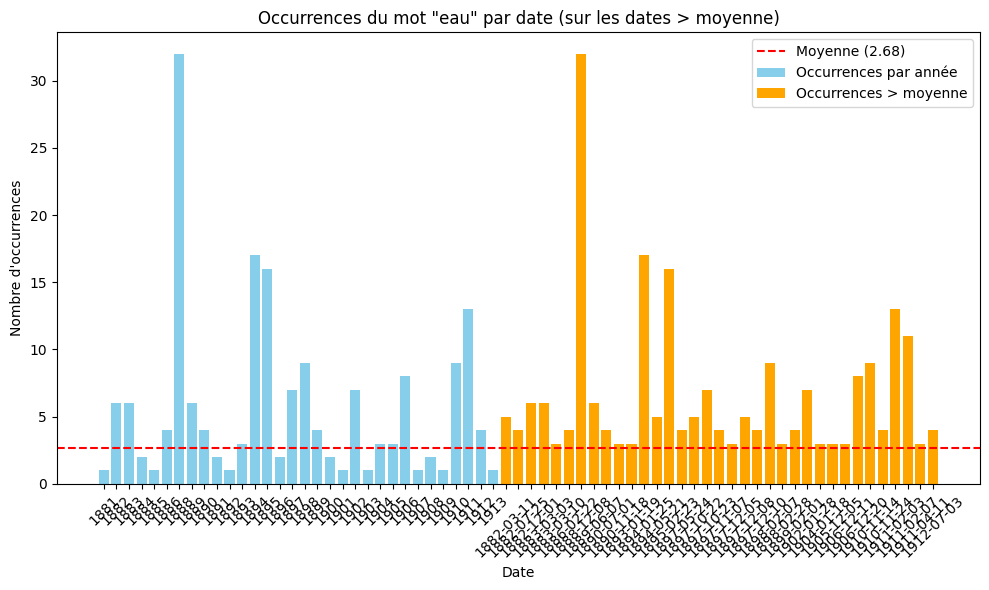

In [ ]:
#Occurences par an et celles supp à la moyenne 
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document: 
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

moyenne_occurrences = sum(comptages_par_date.values()) / len(comptages_par_date)

dates = list(comptages_par_date.keys())
annees = [date.split('-')[0] for date in dates]
occurrences = list(comptages_par_date.values())

dates_a_afficher = [date for date in dates if comptages_par_date[date] > moyenne_occurrences]
occurrences_a_afficher = [comptages_par_date[date] for date in dates_a_afficher]

plt.figure(figsize=(10, 6))
plt.bar(annees, occurrences, color='skyblue', label='Occurrences par année')

for i, date in enumerate(dates_a_afficher):
    plt.bar(date, occurrences_a_afficher[i], color='orange', label='Occurrences > moyenne' if i == 0 else "")

plt.xlabel('Date')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences du mot "batellerie" par date (sur les dates > moyenne)')

plt.xticks(rotation=45)

plt.axhline(y=moyenne_occurrences, color='red', linestyle='--', label=f'Moyenne ({moyenne_occurrences:.2f})')

plt.legend()

plt.tight_layout()
plt.show()


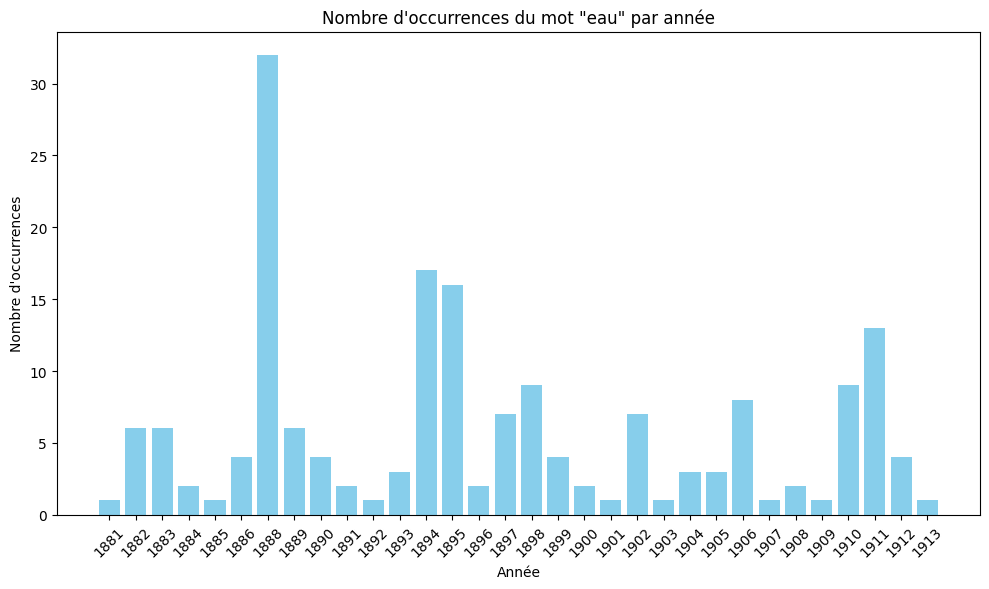

In [ ]:
# total par années : 

import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document: 
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

annees = [date.split('-')[0] for date in comptages_par_date.keys()]
occurrences = list(comptages_par_date.values())

plt.figure(figsize=(10, 6))
plt.bar(annees, occurrences, color='skyblue')

plt.xlabel('Année')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences du mot "batellerie" par année')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


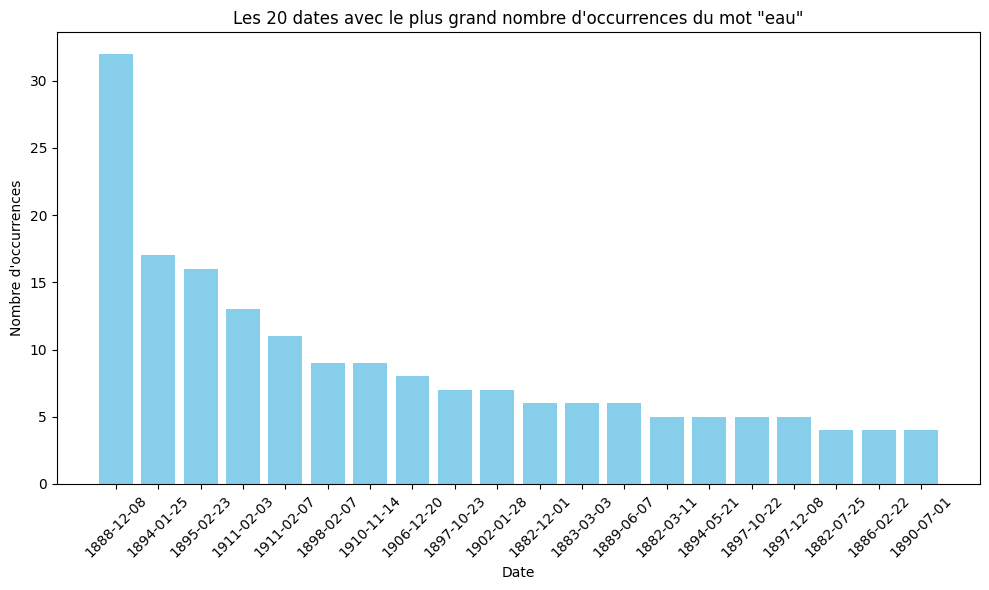

In [ ]:
# Valeurs les plus élevées 


import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)
X = 20 

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates_triees = sorted(comptages_par_date.items(), key=lambda item: item[1], reverse=True)

dates_top_X = [date for date, _ in dates_triees[:X]]
occurrences_top_X = [comptages_par_date[date] for date in dates_top_X]

plt.figure(figsize=(10, 6))
plt.bar(dates_top_X, occurrences_top_X, color='skyblue')

plt.xlabel('Date')
plt.ylabel('Nombre d\'occurrences')
plt.title(f'Les {X} dates avec le plus grand nombre d\'occurrences du mot "batellerie"')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


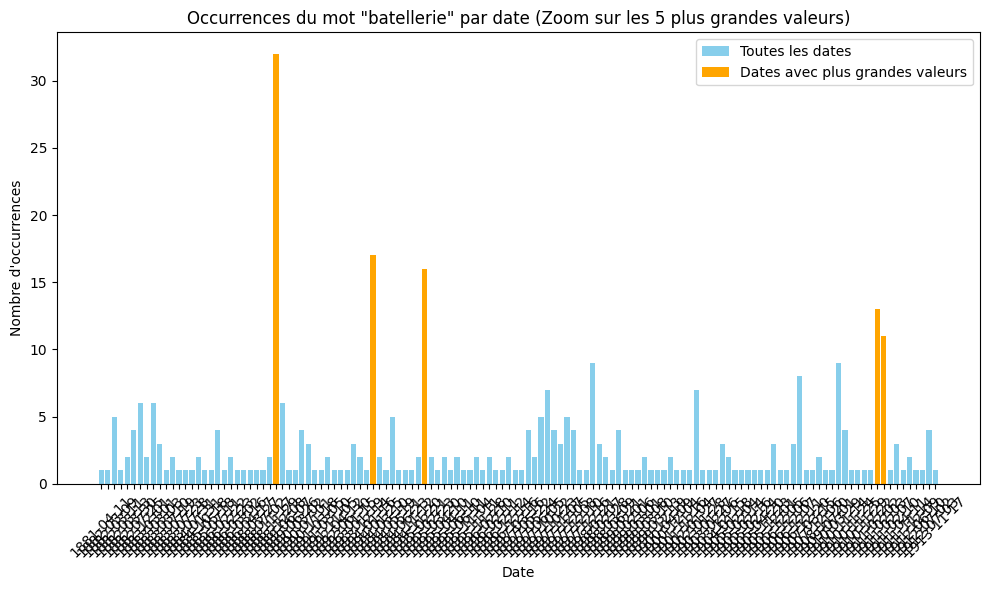

In [ ]:
#occ plus 5 valeurs les plus grandes =/= couleurs 

import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)
X = 5 

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates_triees = sorted(comptages_par_date.items(), key=lambda item: item[1], reverse=True)

dates_top_X = [date for date, _ in dates_triees[:X]]
occurrences_top_X = [comptages_par_date[date] for date in dates_top_X]

plt.figure(figsize=(10, 6))

plt.bar(comptages_par_date.keys(), comptages_par_date.values(), color='skyblue', label='Toutes les dates')

for i, date in enumerate(dates_top_X):
    plt.bar(date, occurrences_top_X[i], color='orange', label=f'Dates avec plus grandes valeurs' if i == 0 else "")

plt.xlabel('Date')
plt.ylabel('Nombre d\'occurrences')
plt.title(f'Occurrences du mot "{mot_cible}" par date (Zoom sur les {X} plus grandes valeurs)')

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


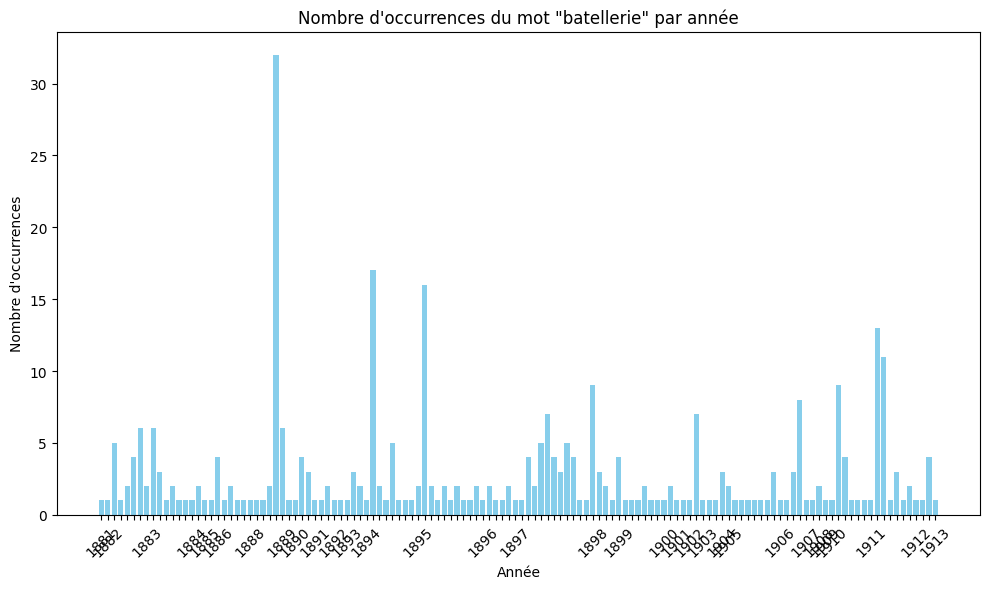

In [ ]:
#Toutes dates avec x=>1 Occurence, uniquement années en légendes
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document: 
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

annees = [date.split('-')[0] for date in comptages_par_date.keys()]
occurrences = list(comptages_par_date.values())

plt.figure(figsize=(10, 6))

bar_width = 0.35
indices = range(len(annees))

plt.bar(indices, occurrences, color='skyblue')

labels = []
for i, annee in enumerate(annees):
    if i == 0 or annees[i] != annees[i - 1]:
        labels.append(annee)
    else:
        labels.append('')

plt.xticks(indices, labels, rotation=45)

plt.xlabel('Année')
plt.ylabel('Nombre d\'occurrences')
plt.title(f'Nombre d\'occurrences du mot "{mot_cible}" par année')

plt.tight_layout()
plt.show()



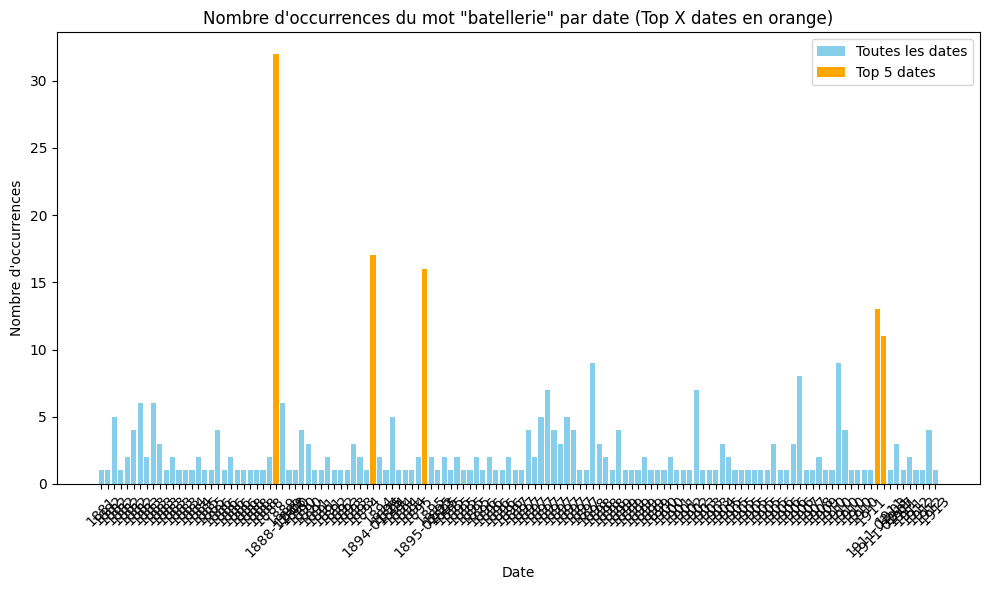

In [ ]:
#couleurs et dates des 5 plus occurences mis en avant (a corriger) 

import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document: 
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower()) 
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates = list(comptages_par_date.keys())
annees = [date.split('-')[0] for date in dates]
occurrences = list(comptages_par_date.values())

X = 5 
top_dates = sorted(comptages_par_date.items(), key=lambda x: x[1], reverse=True)[:X]
top_dates_dict = dict(top_dates)

plt.figure(figsize=(10, 6))

bar_width = 0.35
indices = range(len(dates))

plt.bar(indices, occurrences, color='skyblue', label='Toutes les dates')

highlight_indices = [indices[dates.index(date)] for date in top_dates_dict.keys()]
highlight_values = [top_dates_dict[date] for date in top_dates_dict.keys()]

plt.bar(highlight_indices, highlight_values, color='orange', label=f'Top {X} dates')

labels = []
for i, date in enumerate(dates):
    label = annees[i]
    
    if date in top_dates_dict:
        label = date 
    labels.append(label)

plt.xticks(indices, labels, rotation=45)

plt.xlabel('Date')
plt.ylabel('Nombre d\'occurrences')
plt.title(f'Nombre d\'occurrences du mot "{mot_cible}" par date (Top {X} dates en orange)')

plt.legend()
plt.tight_layout()
plt.show()


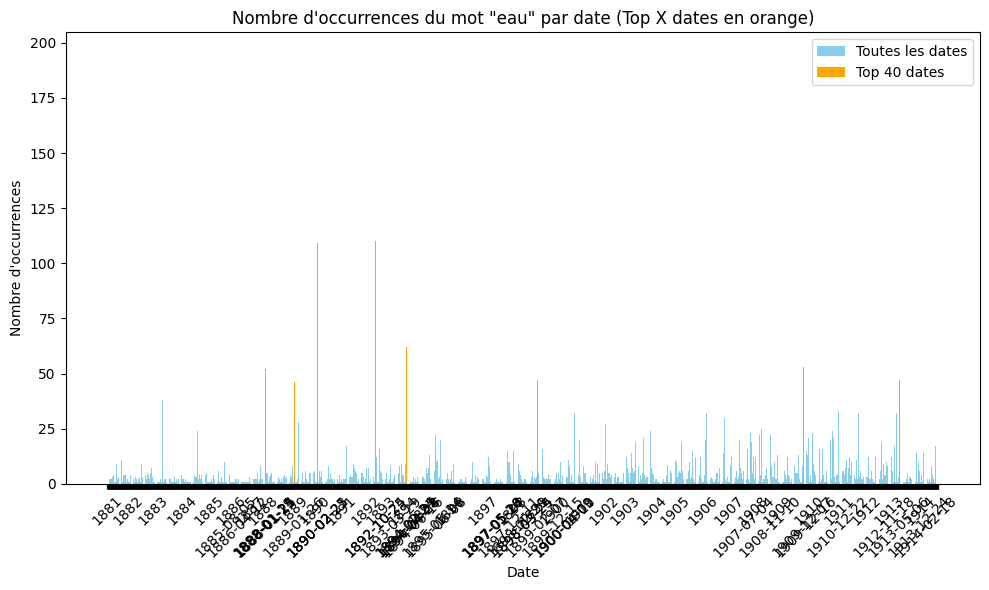

In [ ]:
# Dates mieux affichées
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates = list(comptages_par_date.keys())
annees = [date.split('-')[0] for date in dates]
occurrences = list(comptages_par_date.values())

X = 40


top_dates = sorted(comptages_par_date.items(), key=lambda x: x[1], reverse=True)[:X]
top_dates_dict = dict(top_dates)


plt.figure(figsize=(10, 6))


bar_width = 0.35
indices = range(len(dates))

plt.bar(indices, occurrences, color='skyblue', label='Toutes les dates')

highlight_indices = [indices[dates.index(date)] for date in top_dates_dict.keys()]
highlight_values = [top_dates_dict[date] for date in top_dates_dict.keys()]

plt.bar(highlight_indices, highlight_values, color='orange', label=f'Top {X} dates')


labels = []
for i, date in enumerate(dates):
    if date in top_dates_dict:
        labels.append(date) 
    
    elif i == 0 or annees[i] != annees[i - 1]:
        labels.append(annees[i])
    else:
        labels.append('')  

plt.xticks(indices, labels, rotation=45)

plt.xlabel('Date')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences du mot "eau" par date (Top X dates en orange)')

plt.legend()

plt.tight_layout()

plt.show()



Top 30 dates avec leurs occurrences :
1888-12-08: 32 occurrences
1894-01-25: 17 occurrences
1895-02-23: 16 occurrences
1911-02-03: 13 occurrences
1911-02-07: 11 occurrences
1898-02-07: 9 occurrences
1910-11-14: 9 occurrences
1906-12-20: 8 occurrences
1897-10-23: 7 occurrences
1902-01-28: 7 occurrences
1882-12-01: 6 occurrences
1883-03-03: 6 occurrences
1889-06-07: 6 occurrences
1882-03-11: 5 occurrences
1894-05-21: 5 occurrences
1897-10-22: 5 occurrences
1897-12-08: 5 occurrences
1882-07-25: 4 occurrences
1886-02-22: 4 occurrences
1890-07-01: 4 occurrences
1897-05-24: 4 occurrences
1897-11-07: 4 occurrences
1897-12-10: 4 occurrences
1899-02-01: 4 occurrences
1910-11-24: 4 occurrences
1912-07-03: 4 occurrences
1883-03-10: 3 occurrences
1890-11-18: 3 occurrences
1893-01-19: 3 occurrences
1897-12-05: 3 occurrences


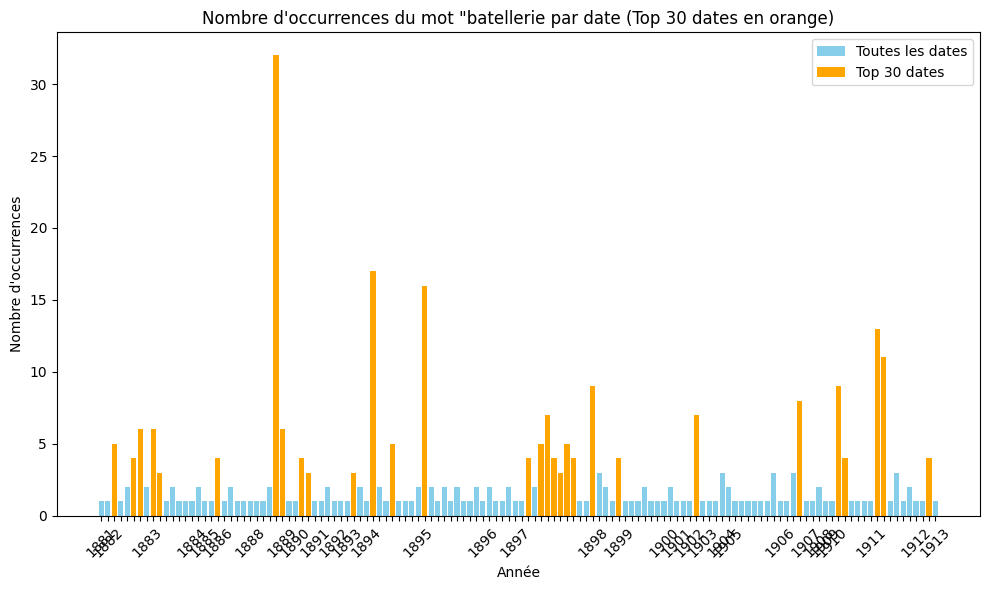

In [ ]:
# X top dates avec occurences infos + couleurs

import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in os.listdir(dossier):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates = list(comptages_par_date.keys())
annees = [date.split('-')[0] for date in dates]
occurrences = list(comptages_par_date.values())


X = 30 


top_dates = sorted(comptages_par_date.items(), key=lambda x: x[1], reverse=True)[:X]
top_dates_dict = dict(top_dates)


print(f"\nTop {X} dates avec leurs occurrences :")
for date, value in top_dates_dict.items():
    print(f"{date}: {value} occurrences")


plt.figure(figsize=(10, 6))

indices = range(len(dates))


plt.bar(indices, occurrences, color='skyblue', label='Toutes les dates')

highlight_indices = [indices[dates.index(date)] for date in top_dates_dict.keys()]
highlight_values = [top_dates_dict[date] for date in top_dates_dict.keys()]

plt.bar(highlight_indices, highlight_values, color='orange', label=f'Top {X} dates')

labels = []
for i, date in enumerate(dates):
    if i == 0 or annees[i] != annees[i - 1]:
        labels.append(annees[i])
    else:
        
        labels.append('')

plt.xticks(indices, labels, rotation=45)

plt.xlabel('Année')
plt.ylabel('Nombre d\'occurrences')
plt.title(f'Nombre d\'occurrences du mot "{mot_cible} par date (Top {X} dates en orange)')

plt.legend()

plt.tight_layout()

plt.show()


100%|██████████| 4512/4512 [01:49<00:00, 41.26it/s]



Top 30 dates avec leurs occurrences :
1910-11-14: 30 occurrences
1910-11-24: 16 occurrences
1913-05-06: 11 occurrences
1882-03-28: 8 occurrences
1882-11-11: 8 occurrences
1913-02-07: 6 occurrences
1908-11-21: 5 occurrences
1910-01-31: 5 occurrences
1910-02-08: 5 occurrences
1910-12-02: 5 occurrences
1912-01-19: 5 occurrences
1881-03-24: 4 occurrences
1910-12-22: 4 occurrences
1882-05-09: 3 occurrences
1883-06-11: 3 occurrences
1883-07-05: 3 occurrences
1896-12-04: 3 occurrences
1896-12-11: 3 occurrences
1897-12-17: 3 occurrences
1897-12-21: 3 occurrences
1898-02-21: 3 occurrences
1900-12-05: 3 occurrences
1906-01-30: 3 occurrences
1908-03-23: 3 occurrences
1910-12-24: 3 occurrences
1912-02-01: 3 occurrences
1912-06-07: 3 occurrences
1881-05-24: 2 occurrences
1882-06-12: 2 occurrences
1882-07-18: 2 occurrences


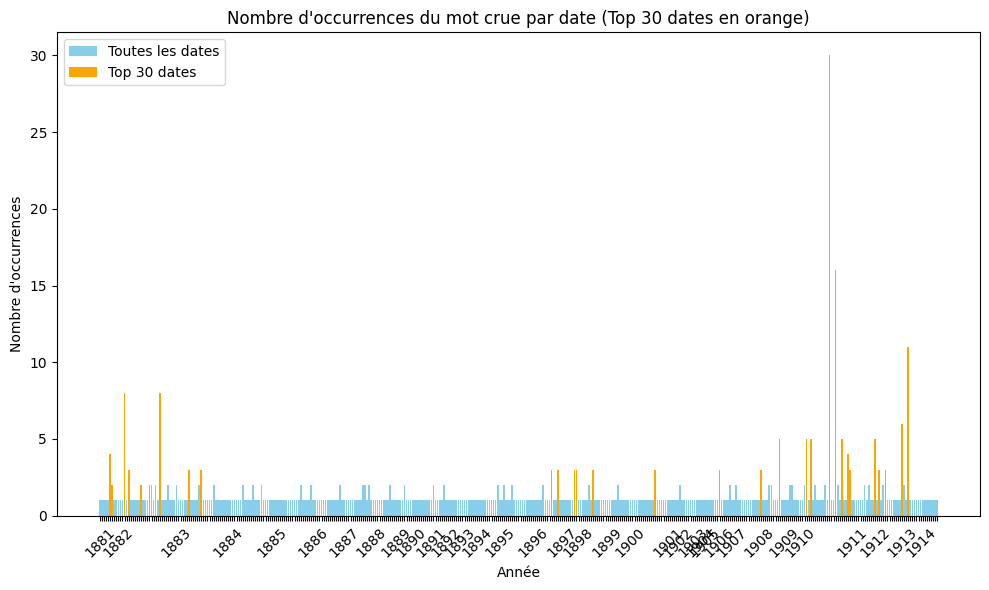

In [ ]:
#version finale affichage

import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "crue"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

for fichier in tqdm(os.listdir(dossier)):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                
                resultats_par_date[date_document].append((index + 1, contexte_texte))

comptages_par_date = {date: len(occurrences) for date, occurrences in resultats_par_date.items()}

dates = list(comptages_par_date.keys())
annees = [date.split('-')[0] for date in dates]
occurrences = list(comptages_par_date.values())

X = 30  

top_dates = sorted(comptages_par_date.items(), key=lambda x: x[1], reverse=True)[:X]
top_dates_dict = dict(top_dates)

print(f"\nTop {X} dates avec leurs occurrences :")
for date, value in top_dates_dict.items():
    print(f"{date}: {value} occurrences")

plt.figure(figsize=(10, 6))

indices = range(len(dates))

plt.bar(indices, occurrences, color='skyblue', label='Toutes les dates')

highlight_indices = [indices[dates.index(date)] for date in top_dates_dict.keys()]
highlight_values = [top_dates_dict[date] for date in top_dates_dict.keys()]

plt.bar(highlight_indices, highlight_values, color='orange', label=f'Top {X} dates')


labels = []
for i, date in enumerate(dates):
    if i == 0 or annees[i] != annees[i - 1]:
        labels.append(annees[i])
    else:
        labels.append('')

plt.xticks(indices, labels, rotation=45)

plt.xlabel('Année')
plt.ylabel('Nombre d\'occurrences')
plt.title(f'Nombre d\'occurrences du mot {mot_cible} par date (Top {X} dates en orange)')

plt.legend()

plt.tight_layout()

plt.show()


In [18]:
import os
import re
from collections import defaultdict
from tqdm import tqdm

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

mot_cible_regex = r'\b' + re.escape(mot_cible) + r'\w*|\w*' + re.escape(mot_cible) + r'\b'

for fichier in tqdm(os.listdir(dossier)):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if mot == mot_cible_regex.lower()]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                
                resultats_par_date[date_document].append((index + 1, contexte_texte))


for date, occurrences in sorted(resultats_par_date.items()):
    print(f"Date: {date}")
    for index, contexte in occurrences:
        print(f"  Occurrence {index}: ... {contexte} ...")
    print()


100%|██████████| 4512/4512 [01:47<00:00, 41.82it/s]


In [ ]:
# textes occurences

import os
import re
from collections import defaultdict
from tqdm import tqdm

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "meurtre"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

mot_cible_regex = r'\b' + re.escape(mot_cible) + r'\w*\b'

for fichier in tqdm(os.listdir(dossier)):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if re.match(mot_cible_regex, mot)]

            for index in indices:
                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte))

# Output results
for date, occurrences in sorted(resultats_par_date.items()):
    print(f"Date: {date}")
    for index, contexte in occurrences:
        print(f"  Occurrence {index}: ... {contexte} ...")
    print()


100%|██████████| 4512/4512 [06:22<00:00, 11.79it/s]

Date: 1881-01-24
  Occurrence 7454: ... art ie toutes personnes qui auront provoqué le meurtre l incendie le pillage ou qui conseillent formellement ...
  Occurrence 7545: ... aura fait entendre un cri de provocation au meurtre sera puni de trois ans de la chaîne ...
  Occurrence 7556: ... de trois ans de la chaîne si le meurtre ne s est pas commis et comme complice ...

Date: 1881-01-25
  Occurrence 17539: ... par tout autre moyen de publication provoquerait au meurtre ou à la sédjtion messieurs les hommes qui ...
  Occurrence 17665: ... la républiqueet punition des hommes audacieux quicornertent le meurtre ou qui provoquent àl assanat et à la ...
  Occurrence 17814: ... ici sévère contre des hommes quipro quent au meurtre mais lorsque l ondescedans les détails de cette ...

Date: 1881-01-27
  Occurrence 4148: ... juillet 1791 1toutes personnes qui auront provoqué le meurtre l incendie le pillage ou qui conseillent formellement ...
  Occurrence 4237: ... aura fait entendre un cri de p

In [ ]:
#Textes occurences relatives / (mettre numéros de page ?)
import os
import re
from collections import defaultdict
from tqdm import tqdm

dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted_av14'
mot_cible = "batellerie"
contexte = 8
resultats_par_date = defaultdict(list)

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None

mot_cible_regex = r'\b' + re.escape(mot_cible) + r'\w*\b'

for fichier in tqdm(os.listdir(dossier)):
    if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
        date_document = extraire_date(fichier)
        
        if date_document:  
            with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                longue_chaine = f.read()

            mots = re.findall(r'\b\w+\b', longue_chaine.lower())  
            indices = [i for i, mot in enumerate(mots) if re.match(mot_cible_regex, mot)]

            total_mots = len(mots)

            for index in indices:
                pourcentage_position = (index / total_mots) * 100

                debut = max(0, index - contexte)
                fin = min(len(mots), index + contexte + 1)

                contexte_texte = ' '.join(mots[debut:fin])

                resultats_par_date[date_document].append((index + 1, contexte_texte, pourcentage_position))

for date, occurrences in sorted(resultats_par_date.items()):
    print(f"Date: {date}")
    for index, contexte, pourcentage in occurrences:
        print(f"  Occurrence {index} ({pourcentage:.2f}% du texte): ... {contexte} ...")
    print()


  0%|          | 0/4512 [00:00<?, ?it/s]

100%|██████████| 4512/4512 [04:18<00:00, 17.44it/s]

Date: 1881-04-11
  Occurrence 37266 (96.29% du texte): ... l etat se borne à mettre à laqtraltl0ndela batellerie des voies de navifatioaussiparfaitesque possible et c est ...

Date: 1882-03-09
  Occurrence 26817 (68.86% du texte): ... nord par suite de la concurrence que la batellerie fait au chemin de fer du nord concurrence ...

Date: 1882-03-11
  Occurrence 28671 (94.00% du texte): ... rôle en mettant à la disposition de la batellerie des voies de navigation aussi parfaites que possible ...
  Occurrence 28825 (94.50% du texte): ... entier le moyen serait l uniformisation de la batellerie par le système beuchot les conséquences inévitables seraient ...
  Occurrence 28847 (94.57% du texte): ... de son adoption de toutes les entreprises de batellerie privée dues à la libre concurrence en face ...
  Occurrence 27300 (94.18% du texte): ... rempli son rôle en mettantà disposition de la batellerie des voies dena gation aussi parfaites que possible ...
  Occurrence 27447 (94.69% du texte): 